In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Dropout, Input,  Convolution2D, MaxPooling2D, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model

In [3]:
#get the train images from file location and add them to the numpy array
image_dir = 'D:/FYP/RAF-ML/Images/allimages'

target_size = (100, 100)

train_images = np.zeros((3926, target_size[0], target_size[1], 3), dtype=np.uint8)
test_images = np.zeros((982, target_size[0], target_size[1], 3), dtype=np.uint8)

train_labels = np.zeros((3926, 6), dtype=np.uint8)
test_labels = np.zeros((982, 6), dtype=np.uint8)

i = 0
j = 0

with open('D:/FYP/RAF-ML/partition_label.txt') as f:
    for line in f:
        file_name, partition = line.strip().split()
        image_name, image_ex = file_name.strip().split(".")
        source = os.path.join(image_dir, image_name + "_aligned." + image_ex)
        if(partition == "0"):
            image = cv2.imread(source)
            image = cv2.resize(image, target_size)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            train_images[i] = image
            with open('D:/FYP/RAF-ML/multilabel.txt', 'r') as f:
                lines = f.readlines()
                for line in lines:
                    values = line.split()
                    if(values[0]== file_name):
                        train_labels[i] = [int(val) for val in values[1:]]      
                i = i + 1
        else:
            image = cv2.imread(source)
            image = cv2.resize(image, target_size)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            test_images[j] = image
            with open('D:/FYP/RAF-ML/multilabel.txt', 'r') as f:
                lines = f.readlines()
                for line in lines:
                    values = line.split()
                    if(values[0]== file_name):
                        test_labels[j] = [int(val) for val in values[1:]]   
            j = j + 1


print(train_images.shape)
print(test_images.shape)

print(train_labels.shape)
print(test_labels.shape)

(3926, 100, 100, 3)
(982, 100, 100, 3)
(3926, 6)
(982, 6)


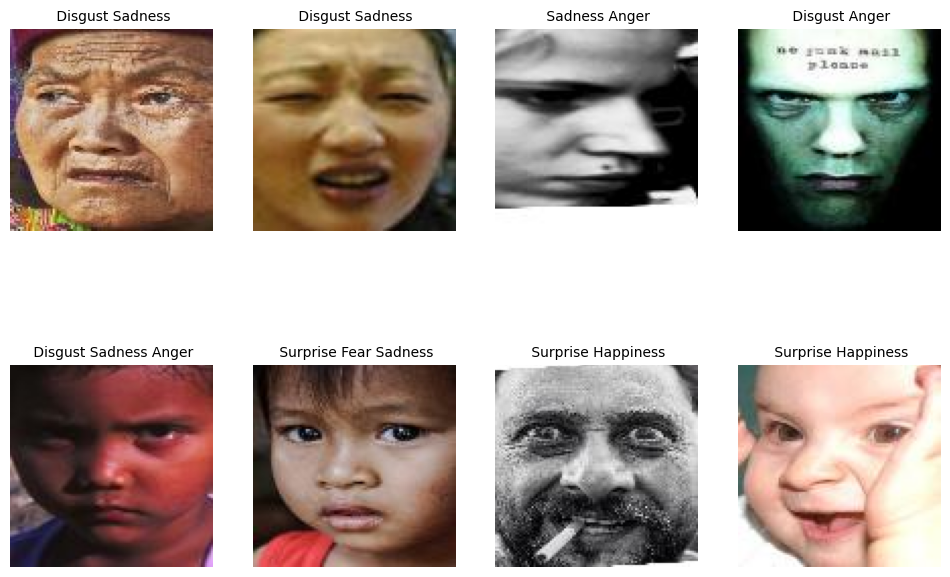

In [4]:
categories = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger']

no_images = 8
no_col = 4
no_row = no_images//no_col 

style.use("default")
plt.figure(figsize=(12,4*no_row))

    

for i in range(no_row*no_col):
    category = ""
    ax = plt.subplot(no_row, no_col, i+1)
    plt.imshow(train_images[i])
    for j in range(6):
        if train_labels[i][j] == 1:
            category = category + " " + categories[j]
    plt.title(category, size=10)
    plt.axis('off')

In [14]:
size = 100
class_no = 6

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(size,size,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(class_no, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 100, 100, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 100, 100, 32)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 98, 98, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 98, 98, 32)       

In [16]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
Train = model.fit(
    train_images, 
    train_labels, 
    epochs=10,
    batch_size = 32,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
123/123 [==============================] - 182s 1s/step - loss: 1.2846 - accuracy: 0.3362 - val_loss: 0.6731 - val_accuracy: 0.4165
Epoch 2/10
123/123 [==============================] - 189s 2s/step - loss: 0.6119 - accuracy: 0.4646 - val_loss: 0.5611 - val_accuracy: 0.5367
Epoch 3/10
123/123 [==============================] - 180s 1s/step - loss: 0.5334 - accuracy: 0.5945 - val_loss: 0.5376 - val_accuracy: 0.6772
Epoch 4/10
123/123 [==============================] - 173s 1s/step - loss: 0.4966 - accuracy: 0.6235 - val_loss: 0.5012 - val_accuracy: 0.6354
Epoch 5/10
123/123 [==============================] - 175s 1s/step - loss: 0.4677 - accuracy: 0.6419 - val_loss: 0.4825 - val_accuracy: 0.6466
Epoch 6/10
123/123 [==============================] - 190s 2s/step - loss: 0.4408 - accuracy: 0.6411 - val_loss: 0.4990 - val_accuracy: 0.5143
Epoch 7/10
123/123 [==============================] - 185s 2s/step - loss: 0.4198 - accuracy: 0.6495 - val_loss: 0.4930 - val_accuracy: 0.6303

In [89]:
model.save("ML_DeepLearningModel.h5")

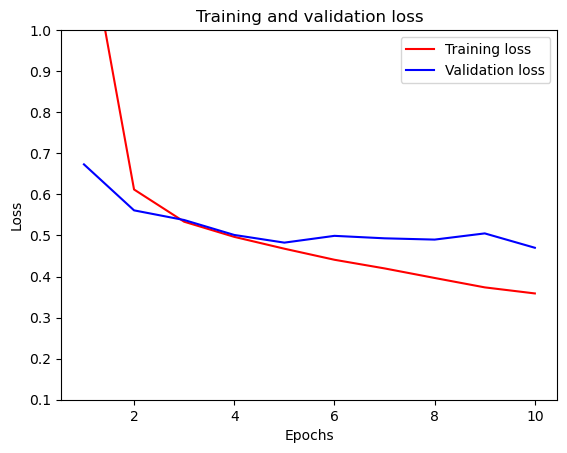

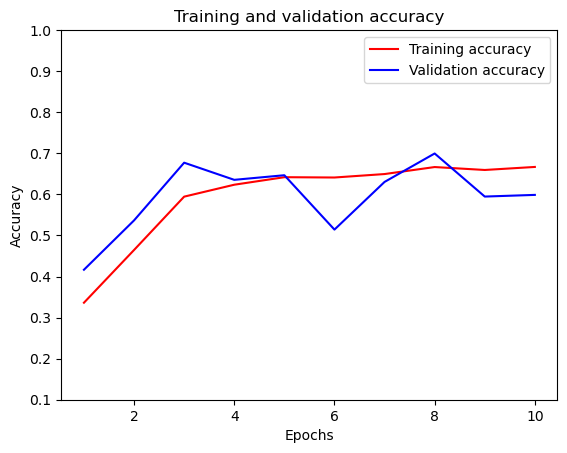

In [18]:
loss = Train.history['loss']
acc = Train.history['accuracy']
val_loss = Train.history['val_loss']
val_acc = Train.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# plot the training and validation loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.axis(ymin=0.1,ymax=1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.axis(ymin=0.1,ymax=1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 165ms/step
[[0.9416278  0.2761639  0.08464858 0.30011767 0.03019361 0.10776098]]
Surprise (0.942)
Happiness (0.3)
Fear (0.276)


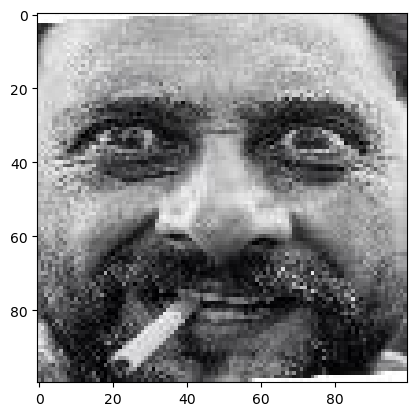

In [19]:
from tensorflow.keras.preprocessing import image

categories = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger']

img = image.load_img('D:/FYP/RAF-ML/Images/allimages/0008_aligned.jpg', target_size=(100, 100, 3))
#img = image.load_img('C:/Users/User/Downloads/13.jpg', target_size=(100, 100, 3))
plt.imshow(img)
img = image.img_to_array(img)
#img = img/255.0

img = img.reshape(1, 100, 100, 3)
y_prob = model.predict(img)
print(y_prob)
top_3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
    print("{}".format(categories[top_3[i]])+" ({:.3})".format(y_prob[0][top_3[i]]))